In [74]:
import pandas as pd
from pathlib import Path
import os

base_directory = Path(os.getcwd()).parent
file_path = "data\\data_for_training.csv"
path = os.path.join(base_directory, file_path)

print(path)

c:\Energy-Demand-Prediction\data\data_for_training.csv


In [75]:
df = pd.read_csv(path, delimiter=",", parse_dates=["time"], index_col="time")
df

,PL_load MW,PL_solar_generation MW,PL_wind_onshore_generation MW,hour,dayofweek,month,is_weekend,season,is_holiday,Load_lag_1h,...,is_day,temperature_1h,temperature_24h,temperature_rolling_mean_24h,apparent_temperature_1h,apparent_temperature_24h,apparent_temperature_rolling_mean_24h,is_cold,is_hot,is_comfortable
time,,,,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,14866.75,0.0,3486.90,0,5,1,1,1,0,15491.38,...,0,2.2,-1.0,2.916667,-3.7,-5.5,-2.570833,1,0,0
2015-01-03 02:00:00,14559.70,0.0,3521.60,1,5,1,1,1,0,14866.75,...,0,1.9,-0.1,2.995833,-4.1,-4.4,-2.566667,1,0,0
2015-01-03 03:00:00,14399.30,0.0,3503.70,2,5,1,1,1,0,14559.70,...,0,1.8,0.0,3.066667,-4.3,-4.2,-2.579167,1,0,0
2015-01-03 04:00:00,14584.08,0.0,3487.48,3,5,1,1,1,0,14399.30,...,0,1.7,0.5,3.112500,-4.5,-3.7,-2.620833,1,0,0
2015-01-03 05:00:00,14754.50,0.0,3444.13,4,5,1,1,1,0,14584.08,...,0,1.6,1.1,3.133333,-4.7,-3.1,-2.695833,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 20:00:00,22467.26,0.0,1775.17,18,2,9,0,4,0,23201.60,...,0,13.1,12.9,12.641667,11.5,11.5,10.687500,0,0,1
2020-09-30 21:00:00,20788.89,0.0,1584.12,19,2,9,0,4,0,22467.26,...,0,13.1,12.8,12.645833,11.2,11.1,10.700000,0,0,1
2020-09-30 22:00:00,19040.56,0.0,1329.56,20,2,9,0,4,0,20788.89,...,0,12.9,12.5,12.645833,11.4,10.7,10.716667,0,0,1


In [76]:
from sklearn.model_selection import train_test_split


y = df["PL_load MW"]  
X = df.drop(columns=["PL_load MW"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [77]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

MAE: 146.9672660011603
RMSE: 202.32851425751514


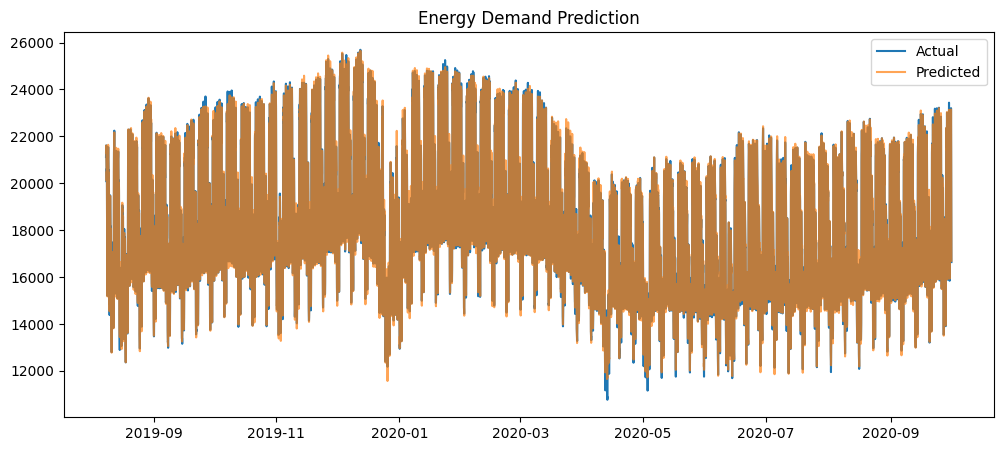

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Energy Demand Prediction")
plt.show()

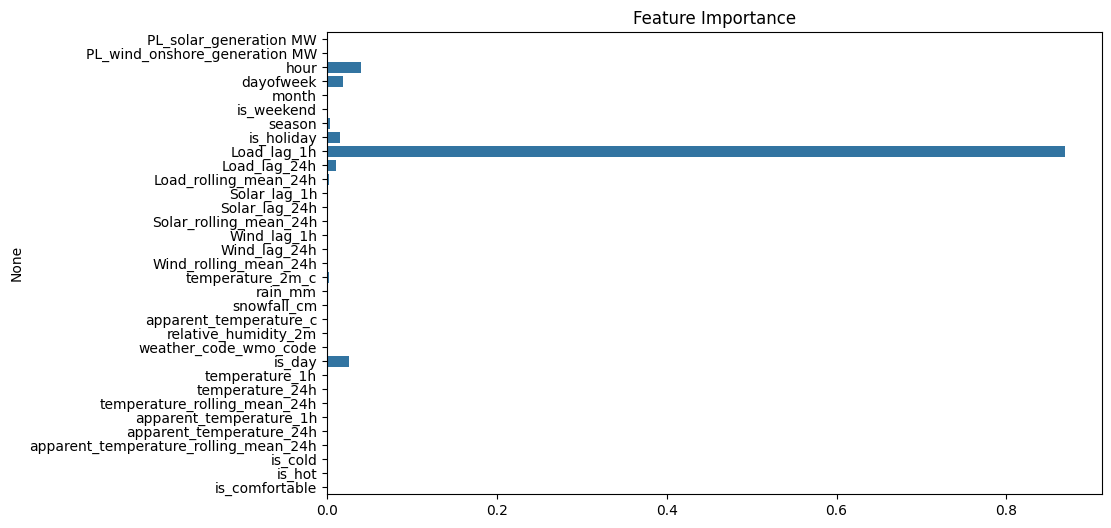

In [80]:
import seaborn as sns

importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

In [81]:
import pandas as pd

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=False, inplace=True)
print(feat_importance)

Load_lag_1h                              0.868924
hour                                     0.040728
is_day                                   0.025700
dayofweek                                0.018726
is_holiday                               0.015214
Load_lag_24h                             0.011132
season                                   0.004029
Load_rolling_mean_24h                    0.002570
temperature_2m_c                         0.002027
month                                    0.001564
is_comfortable                           0.001336
temperature_24h                          0.001012
is_hot                                   0.000868
relative_humidity_2m                     0.000832
apparent_temperature_1h                  0.000761
temperature_rolling_mean_24h             0.000693
apparent_temperature_rolling_mean_24h    0.000662
apparent_temperature_c                   0.000624
temperature_1h                           0.000577
apparent_temperature_24h                 0.000382


In [82]:
selected_features = feat_importance[feat_importance > 0.01].index
X_selected = X[selected_features]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, shuffle=False
)

In [84]:
model.fit(X_selected, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [85]:
y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

MAE: 136.89748746261665
RMSE: 185.9755202936494


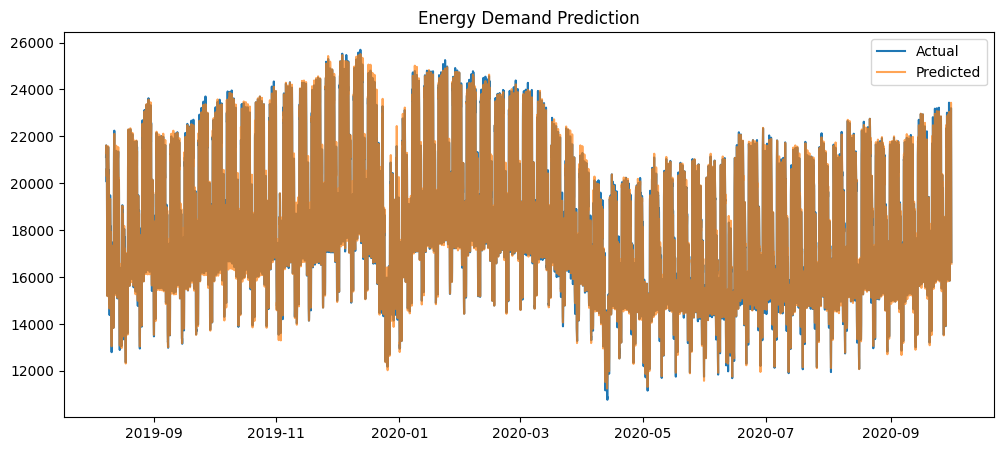

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Energy Demand Prediction")
plt.show()

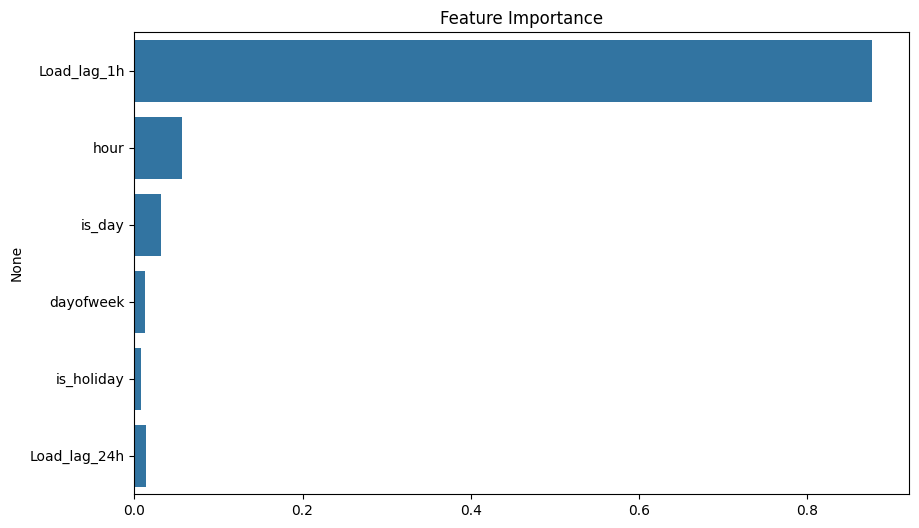

In [87]:
import seaborn as sns

importance = model.feature_importances_
features = X_selected.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

In [88]:
file_path = "models\\xboost_test.json"
path = os.path.join(base_directory, file_path)

model.save_model(path) 